In [50]:
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
bike= pd.read_csv('bike.csv', encoding = 'utf-8')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [53]:
print(bike.shape)

(10886, 12)


In [54]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [55]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [56]:
#datetime을 날짜로 인식시키기
bike['datetime']=pd.to_datetime(bike['datetime'])

In [57]:
bike.head(6)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [58]:
#datetime(object->datetime64)으로 바뀌었는지 확인
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [59]:
#datetime 쪼개서 열 추가
bike['year']=bike['datetime'].dt.year
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour']=bike['datetime'].dt.hour
bike['minute']=bike['datetime'].dt.minute
bike['second']=bike['datetime'].dt.second

#dayofweek는 요일을 가져오는 말
#월(0)화(1)수(2)목(3)금(4)토(5)일(6)
bike['dayofweek']=bike['datetime'].dt.dayofweek

In [60]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<AxesSubplot:xlabel='year', ylabel='count'>

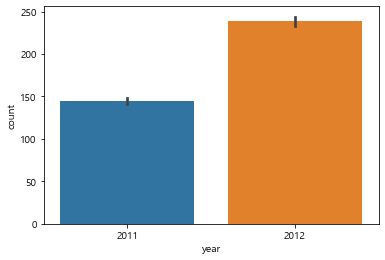

In [61]:
#year별 자전거 수요량
sns.barplot(data=bike, x='year', y='count')


<AxesSubplot:xlabel='month', ylabel='count'>

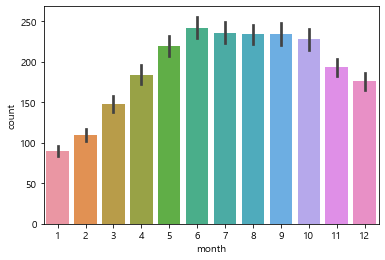

In [62]:
#month
sns.barplot(data=bike, x='month', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

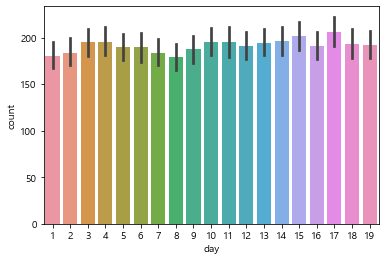

In [63]:
#day
sns.barplot(data=bike, x='day', y='count')

#season
sns.barplot(data=bike, x='season', y='count')


In [69]:
#프로그램이 x축, y축으 표현을 못함 -> 그래서 위처럼 sns.barplot 사용해서 그래프 그려줌
#plt.plot(kind='bar',data='bike', x='season', y='count')
#plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

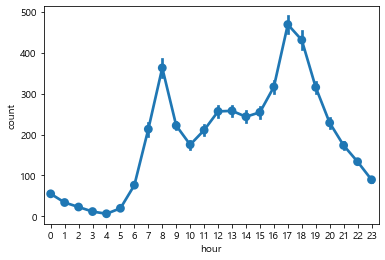

In [75]:
#시간대별 pointplot                    
sns.pointplot(data=bike, x='hour', y='count')

<AxesSubplot:xlabel='hour', ylabel='count'>

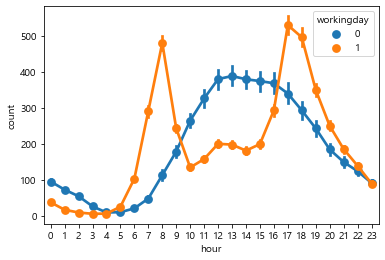

In [77]:
#시간대별 pointplot                           +  평일 구분
sns.pointplot(data=bike, x='hour', y='count', hue='workingday')

<AxesSubplot:xlabel='hour', ylabel='count'>

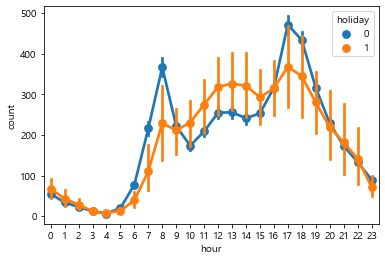

In [76]:
#시간대별 pointplot                           + 휴일 구분
sns.pointplot(data=bike, x='hour', y='count', hue='holiday')

<AxesSubplot:xlabel='hour', ylabel='count'>

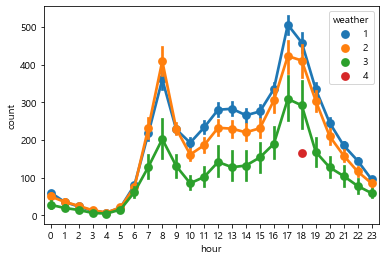

In [74]:
#시간대별 pointplot                           + 계절 구분
sns.pointplot(data=bike, x='hour', y='count', hue='weather')

<AxesSubplot:xlabel='humidity', ylabel='count'>

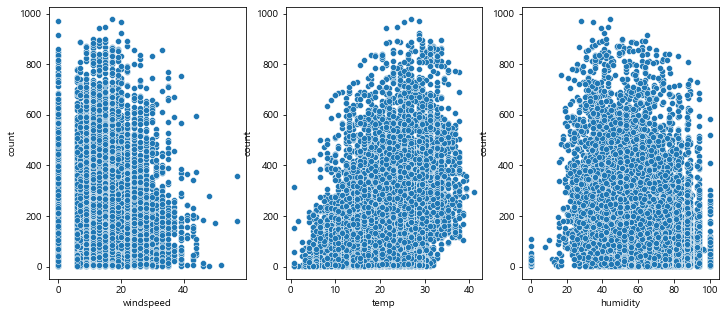

In [81]:
#온도, 습도, 바람세기 
#     figure 이름들                            행수:1 열수:3
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

sns.scatterplot(data=bike, x='windspeed', y = 'count', ax=ax1)
sns.scatterplot(data=bike, x='temp', y = 'count', ax=ax2)
sns.scatterplot(data=bike, x='humidity', y = 'count', ax=ax3)